In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### EDA using Bivariate & Multivariate Analysis

In [3]:
tips =pd.read_csv("D:/Machine_Learning/tips.csv")
flights =pd.read_csv("D:/Machine_Learning/flights.csv")
iris =pd.read_csv("D:/Machine_Learning/iris.csv")  
titanic=pd.read_csv("D:\Machine_Learning\Titanic-Dataset.csv")

#### 1.Scaterplot ( Numerical - Numerical )

In [8]:
tips.sample(2)

,total_bill,tip,sex,smoker,day,time,size
243,18.78,3.0,Female,No,Thur,Dinner,2
128,11.38,2.0,Female,No,Thur,Lunch,2


' Here 2 Numericak columns are there so we use scatterplot'

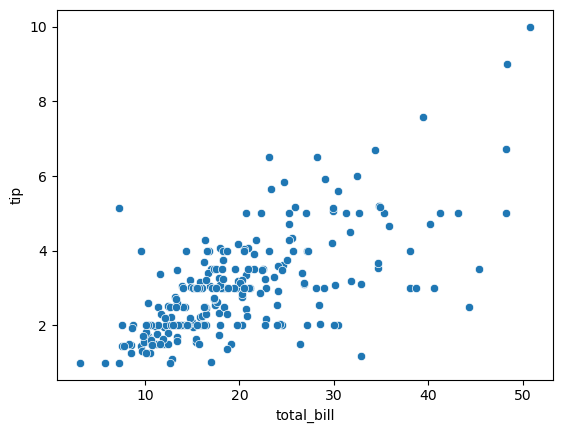

In [16]:
sns.scatterplot(x='total_bill',y='tip',data=tips)

''' Here 2 Numericak columns are there so we use scatterplot'''

'We can see that smoker people are giving more tips as compared to non-smoker ,Just added another info. to the graphical representation'

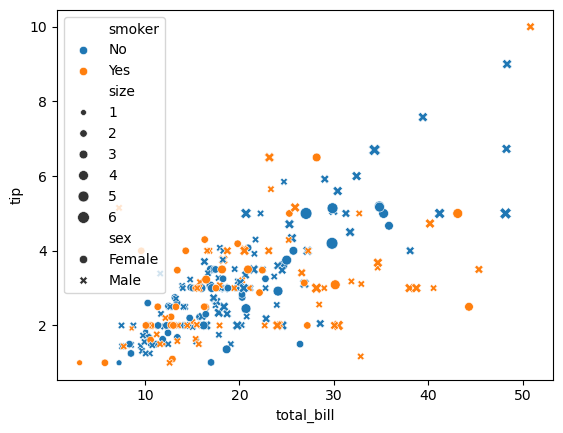

In [8]:
sns.scatterplot(x='total_bill',y='tip',data=tips,hue='smoker',style=tips['sex'],size=tips['size']) #hue is used for categorical column

'''We can see that smoker people are giving more tips as compared to non-smoker ,Just added another info. to the graphical representation'''

## Style is used to change the shape of the marker . Size is used to change the size of the marker
## Size shows that as the size of the group increases the tip also increases

### Barplot ( Numerical - Categorical )

In [14]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<Axes: xlabel='Pclass', ylabel='Fare'>

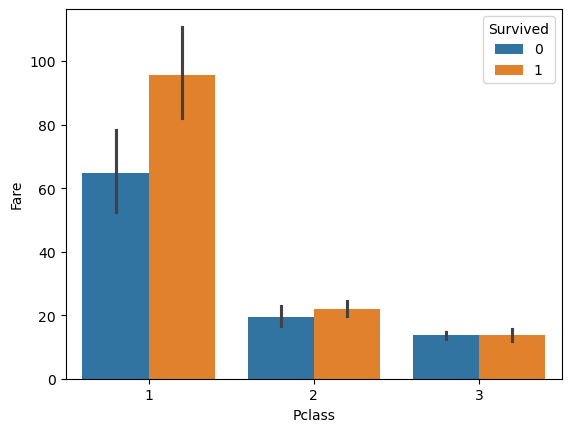

In [4]:
sns.barplot(x='Pclass',y='Fare',data=titanic,hue='Survived')

### Boxplot ( Numerical - Categorical )

<Axes: xlabel='Sex', ylabel='Age'>

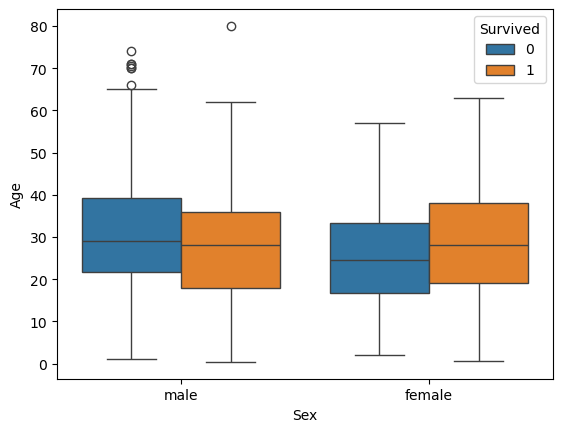

In [5]:
sns.boxplot(x='Sex',y='Age',data=titanic,hue='Survived')

### Distplot ( Numerical - Categorical )

<Axes: xlabel='Age', ylabel='Count'>

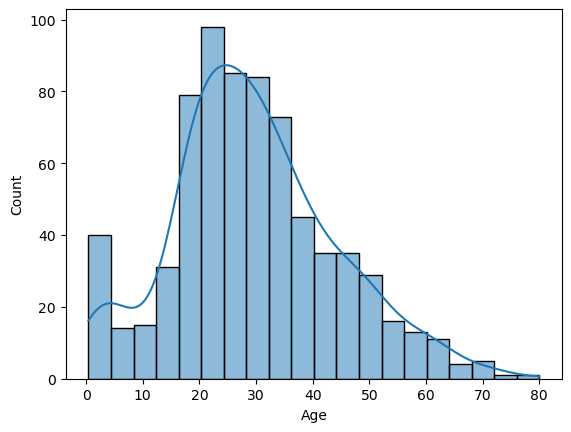

In [10]:
sns.histplot(titanic['Age'],edgecolor='black',kde=True)

<Axes: xlabel='Age', ylabel='Count'>

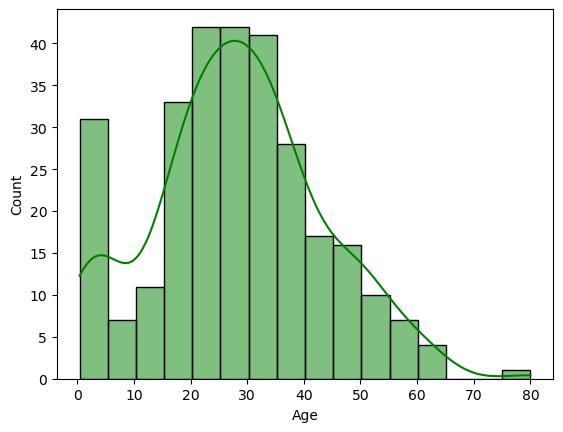

In [15]:
sns.histplot(titanic[titanic['Survived']==1]['Age'],kde=True,color='green')

' এইখানে দেখা যাচ্ছে যে যারা বেঁচে গেছে তাদের বয়সের গড় বেশি এবং যারা মারা গেছে তাদের বয়সের গড় কম। তাই বেঁচে থাকার সম্ভাবনা বেশি বয়সের সাথে সাথে।'

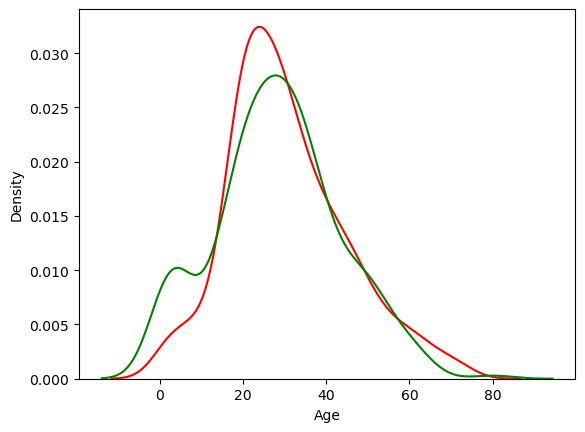

In [23]:
sns.kdeplot(titanic[titanic['Survived']==0]['Age'],color='red')
sns.kdeplot(titanic[titanic['Survived']==1]['Age'],color='green')

''' এইখানে দেখা যাচ্ছে যে যারা বেঁচে গেছে তাদের বয়সের গড় বেশি এবং যারা মারা গেছে তাদের বয়সের গড় কম। তাই বেঁচে থাকার সম্ভাবনা বেশি বয়সের সাথে সাথে।'''

### Heatmap ( Categorical - Categorical )

<Axes: xlabel='Survived', ylabel='Age'>

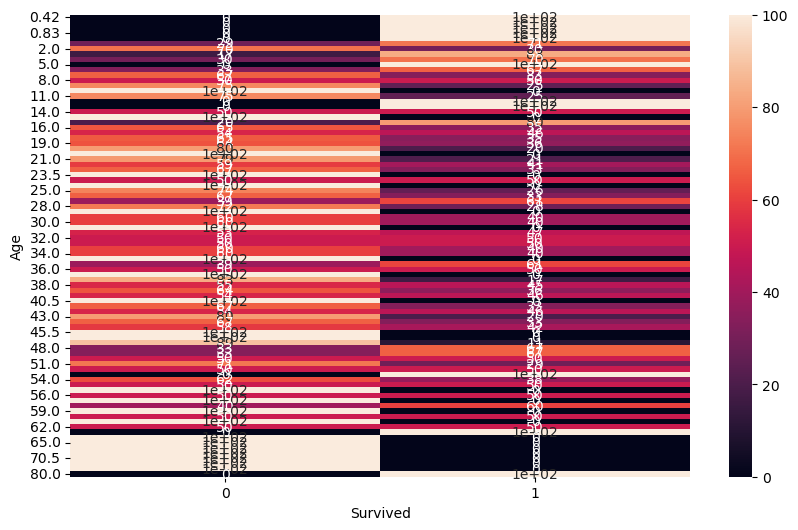

In [ ]:
plt.figure(figsize=(10,6))
Heat_Data=pd.crosstab(titanic['Age'],titanic['Survived'],normalize='index')*100
sns.heatmap(Heat_Data,annot=True)

## Age এর সাথে সাথে বেঁচে থাকার সম্ভাবনা কেমন সেটা Heatmap এর মাধ্যমে দেখা যাচ্ছে 
## Heatmap বেশী ভালো বুঝা যাচ্ছে না কারন Age এর ভ্যালু গুলো অনেক বেশি
## Age কে Group করে দেখলে আরো ভালো বোঝা যাবে

In [ ]:
bins=[0,15,30,45,60,75,90]   #bins মানে হলো বয়স ভাগ করার সীমা(Range) // প্রথম গ্রুপ: 0 থেকে 15 বছর...
labels=['0-15','15-30','30-45','45-60','60-75','75-90']  #labels হলো প্রতিটি গ্রুপের নাম।
titanic['Age_Group']=pd.cut(titanic['Age'],bins=bins,labels=labels)   #AgeGroup নামে নতুন কলাম তৈরি হবে,

In [ ]:
titanic=titanic.dropna(subset=['Age','Survived']) 

## Heatmap করার আগে Age এবং Survived কলাম থেকে যেকোনো NaN ভ্যালু গুলো ড্রপ করে দেয়া সেফ অপশন ।

In [ ]:
Heat_Data=pd.crosstab(titanic['Age_Group'],titanic['Survived'],normalize='index')*100

## দুইটা কলামের মধ্যে সম্পর্ক দেখার জন্য crosstab ব্যবহার করা হয় । Normalize index দিলে প্রতিটি row এর ভ্যালু গুলো ১০০% এর মধ্যে কনভার্ট হয়ে যায়। % দেখার জন্য এটা দরকার।

'X-axis (উপরের দিক) → Survived কলাম // 0 = বাঁচেনি // 1 = বেঁচে গেছে । রঙের গাঢ়ত্ব → শতাংশ যত বেশি, রঙ তত গাঢ়'

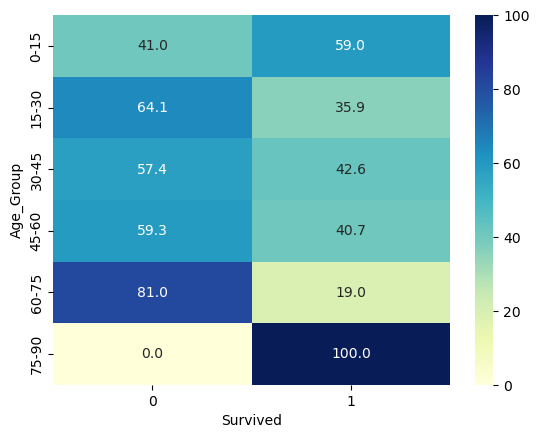

In [21]:
sns.heatmap(Heat_Data,annot=True,fmt=".1f",cmap='YlGnBu')

## fmt মানে হলো format // fmt=".1f"  এর মাধ্যমে দশমিকের পর ১ ঘর দেখানো হবে
## cmap হলো color map // YlGnBu , coolwarm,magma,Blues,YlOrRd এগুলো কালার ম্যাপের নাম
'''X-axis (উপরের দিক) → Survived কলাম // 0 = বাঁচেনি // 1 = বেঁচে গেছে । রঙের গাঢ়ত্ব → শতাংশ যত বেশি, রঙ তত গাঢ়'''

In [22]:
pd.crosstab(titanic['Age_Group'],titanic['Survived'])

## Crosstab এর মাধ্যমে Age_Group এবং Survived কলামের মধ্যে সম্পর্ক দেখানো হয়েছে।
## 75-90 বছর বয়সের মধ্যে ১ জনই ছিলো আর তিনি বেচেও গেছেন তাই Survived density 100% হয়ে গেছে।

Survived,0,1
Age_Group,,
0-15,34,49
15-30,209,117
30-45,116,86
45-60,48,33
60-75,17,4
75-90,0,1
